In [4]:
import sys
import os

basepath = os.getcwd()

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
sns.set(style="whitegrid");

In [11]:
os.chdir(os.path.join(basepath, '../', '../', '../', 'src', 'de_wip_analysis'))

In [33]:
files = os.listdir()
repacked = [file for file in files if '_repack_' in file]

In [34]:
len(repacked)

17600

In [64]:
def extract_data():
    data = {}

    wanted_data = ['repack_time', 'score', 'scorefxn', 'rmsd_before', 'rmsd_after']

    for name in repacked:
        protein = name.split('__')[1]
        run_code = name.split('__')[-1][0:6]

        if protein not in data.keys():
            data[protein] = {}

        if run_code not in data[protein].keys():
            data[protein][run_code] = []

        with open(name, 'r') as f:
            new_data = {}

            for line in f.readlines():
                tokens = re.sub(' {2,}', ' ', line.strip()).split(' ')

                has_data = any([wanted == tokens[0][:-1] for wanted in wanted_data])
                if has_data:
                    new_data[tokens[0][:-1]] = float(tokens[1])
        
        data[protein][run_code].append(new_data)
                    
    return data
                    
data = extract_data()

In [81]:
def extract_data(data, protein, metric):
    pdata = data[protein]
    runs = pdata.keys()
    flatten = lambda l: [item for sublist in l for item in sublist]
    all_data = flatten([pdata[r] for r in runs])
    extracted_metric = [d[metric] for d in all_data]
    
    return extracted_metric

In [84]:
mean = lambda l: sum(l) / len(l)

In [126]:
extracted_data = extract_data(data, '1enh', 'rmsd_after')
extracted_data2 = extract_data(data, '1enh', 'scorefxn')

In [127]:
min(extracted_data), mean(extracted_data), np.std(extracted_data), np.median(extracted_data)

(1.9632, 6.063562704545441, 1.343426088376098, 6.0769000000000002)

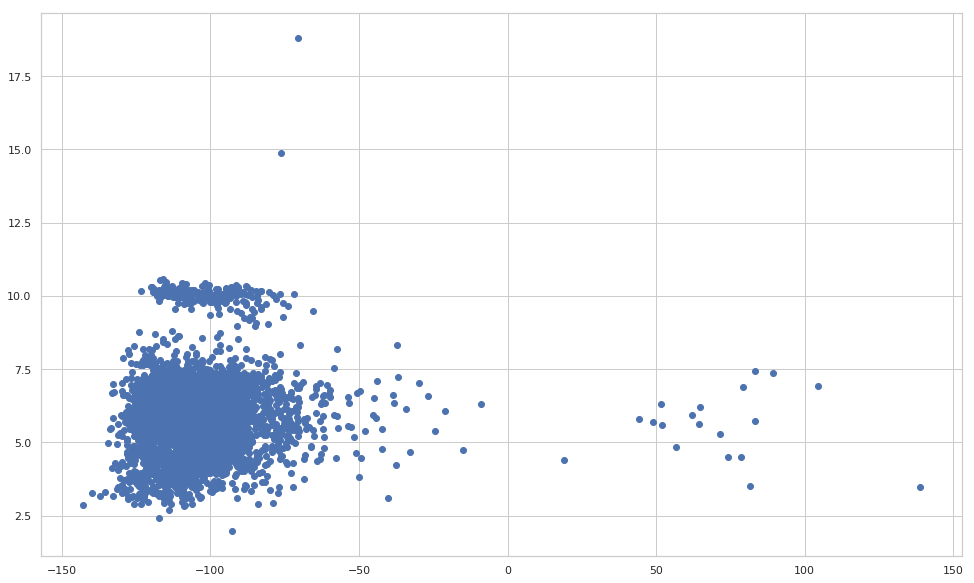

In [128]:
plt.figure(figsize=(16.5, 10))
# plt.xlim(0, len(extracted_data))
# plt.plot(range(len(extracted_data)), sorted(extracted_data))
# plt.plot(range(len(extracted_data)), sorted(extracted_data))
plt.scatter((extracted_data2), (extracted_data))